In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False 
plt.rcParams['font.family'] = 'Malgun Gothic'

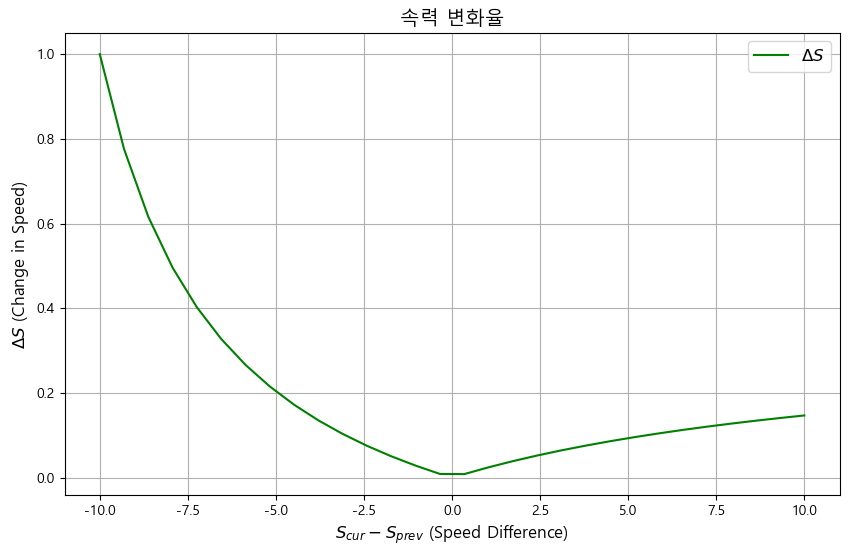

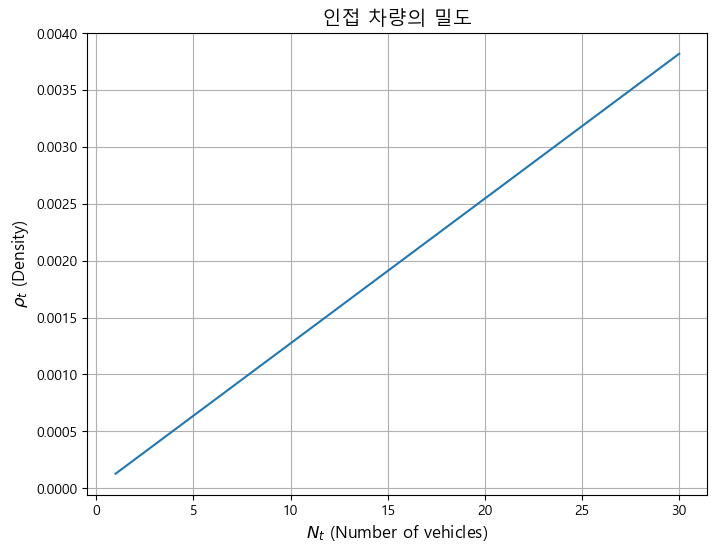

In [2]:
S_prev = np.arange(10, 70, 2)
S_cur = S_prev + np.linspace(-10, 10, len(S_prev))
delta_S = np.where(S_prev != 0, np.abs(S_cur - S_prev) / S_prev, 0)
abs_delta_S = S_cur - S_prev
plt.figure(figsize=(10, 6))
plt.plot(abs_delta_S, delta_S, label="$\\Delta S$", color="green")
plt.title("속력 변화율", fontsize=14)
plt.xlabel("$S_{cur} - S_{prev}$ (Speed Difference)", fontsize=12)
plt.ylabel("$\\Delta S$ (Change in Speed)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

R = 50 
N_t = np.arange(1, 31)
rho_t = N_t / (np.pi * R**2)
plt.figure(figsize=(8, 6))
plt.plot(N_t, rho_t)
plt.title("인접 차량의 밀도", fontsize=14)
plt.xlabel("$N_t$ (Number of vehicles)", fontsize=12)
plt.ylabel("$\\rho_t$ (Density)", fontsize=12)
plt.grid()
plt.show()



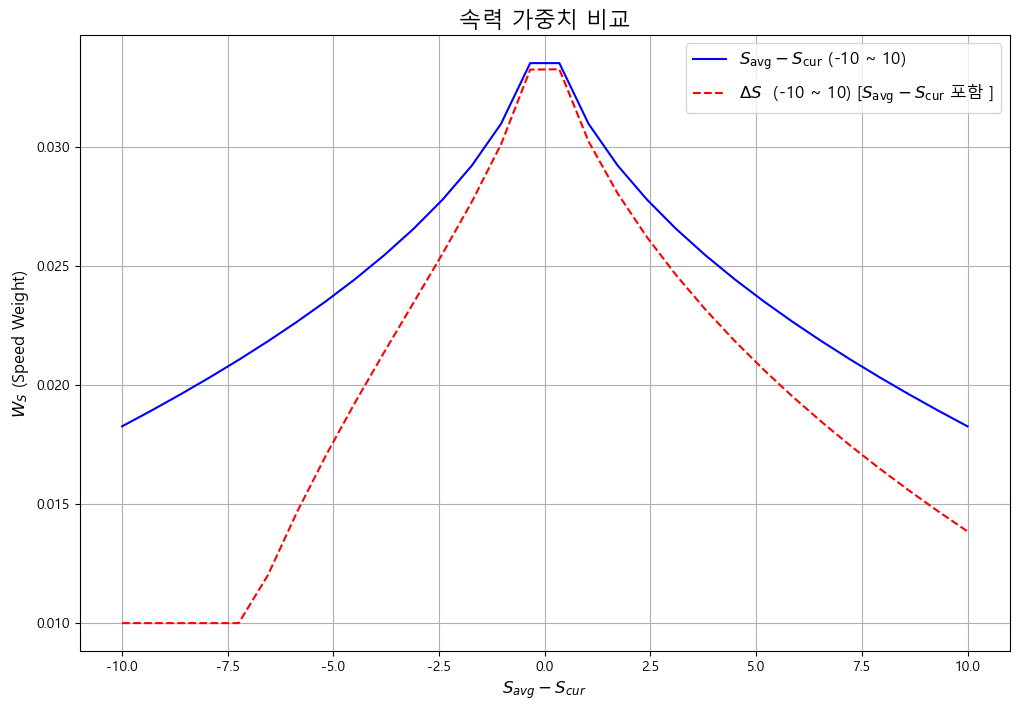

In [3]:
W_base_S = 0.037  # 기본 속도 가중치
S_change = -0.003  # 민감도 계수
F_change = -0.03  # 보정 계수
W_min = 0.01  # Minimum limit for W_S
W_max = 0.10  # Maximum limit for W_S

S_avg = np.mean(S_cur)

W_S_no_Delta = np.clip(
    W_base_S + np.maximum(
        -0.03,
        np.minimum(np.sqrt(np.abs(S_cur - S_avg)) * S_change, 0.03)
    ),
    W_min,
    W_max
)


W_S = np.clip(
    W_base_S +
    np.maximum(
        -0.03,
        np.minimum(np.sqrt(np.abs(S_cur - S_avg)) * S_change, 0.03)
    ) +
    np.maximum(
        -0.02,
        np.minimum(delta_S * F_change, 0.02)
    ),
    W_min, W_max
)

diff = np.linspace(-10, 10, len(S_cur))

plt.figure(figsize=(12, 8))

plt.plot(diff, W_S_no_Delta, label=r"$S_{\text{avg}} - S_{\text{cur}}$ (-10 ~ 10)", color="blue")
plt.plot(diff, W_S, label=r"$\Delta S$  (-10 ~ 10) [$S_{\text{avg}} - S_{\text{cur}} $ 포함 ]", color="red", linestyle="--")

plt.title("속력 가중치 비교", fontsize=16)
plt.xlabel("$S_{\t{avg}} - S_{\t{cur}}$", fontsize=12)
plt.ylabel("$W_S$ (Speed Weight)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()


In [4]:
S_tmp = np.cumsum(S_cur) / np.arange(1, len(S_cur) + 1)
print(S_cur)
print(S_tmp)

[ 0.          2.68965517  5.37931034  8.06896552 10.75862069 13.44827586
 16.13793103 18.82758621 21.51724138 24.20689655 26.89655172 29.5862069
 32.27586207 34.96551724 37.65517241 40.34482759 43.03448276 45.72413793
 48.4137931  51.10344828 53.79310345 56.48275862 59.17241379 61.86206897
 64.55172414 67.24137931 69.93103448 72.62068966 75.31034483 78.        ]
[ 0.          1.34482759  2.68965517  4.03448276  5.37931034  6.72413793
  8.06896552  9.4137931  10.75862069 12.10344828 13.44827586 14.79310345
 16.13793103 17.48275862 18.82758621 20.17241379 21.51724138 22.86206897
 24.20689655 25.55172414 26.89655172 28.24137931 29.5862069  30.93103448
 32.27586207 33.62068966 34.96551724 36.31034483 37.65517241 39.        ]


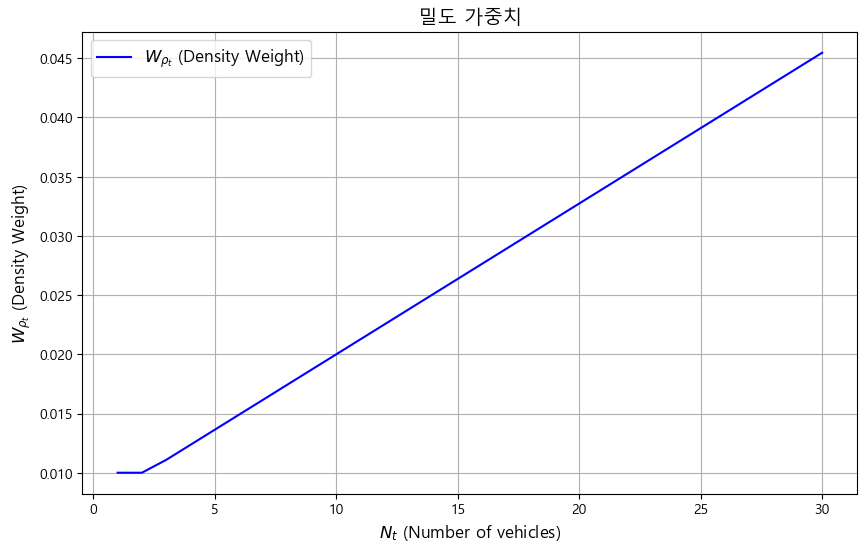

In [5]:
W_base_rho = 0.027
F_rho = 10
W_min = 0.01
W_max = 0.10

rho_t_avg = np.mean(rho_t)

W_rho_t = np.clip(
    W_base_rho + np.maximum(
        -0.03, np.minimum((rho_t - rho_t_avg) * F_rho, 0.03)
    ),
    W_min, W_max
)

plt.figure(figsize=(10, 6))
plt.plot(N_t, W_rho_t, label="$W_{\\rho_t}$ (Density Weight)", color="blue")
plt.title("밀도 가중치", fontsize=14)
plt.xlabel("$N_t$ (Number of vehicles)", fontsize=12)
plt.ylabel("$W_{\\rho_t}$ (Density Weight)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

[0.06366198 0.12732395 0.19098593 0.25464791 0.31830989 0.38197186
 0.44563384 0.50929582 0.5729578  0.63661977 0.70028175 0.76394373
 0.8276057  0.89126768 0.95492966 1.01859164 1.08225361 1.14591559
 1.20957757 1.27323954 1.33690152 1.4005635  1.46422548 1.52788745
 1.59154943 1.65521141 1.71887339 1.78253536 1.84619734 1.90985932]


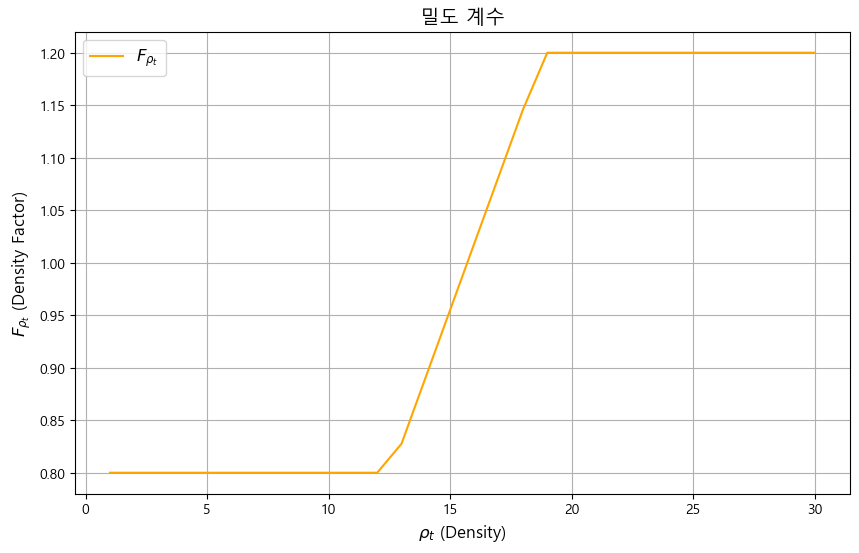

In [6]:
F_rho_t = np.maximum(0.8, np.minimum(1.2, rho_t / 0.002))

print(rho_t / 0.002)

plt.figure(figsize=(10, 6))
plt.plot(N_t, F_rho_t, label="$F_{\\rho_t}$", color="orange")
plt.title("밀도 계수", fontsize=14)
plt.xlabel("$\\rho_t$ (Density)", fontsize=12)
plt.ylabel("$F_{\\rho_t}$ (Density Factor)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_1672\3785646103.py:1: RuntimeWarning: divide by zero encountered in divide
  F_S = np.maximum(0.9, np.minimum(1.1, 35.0 / S_cur))


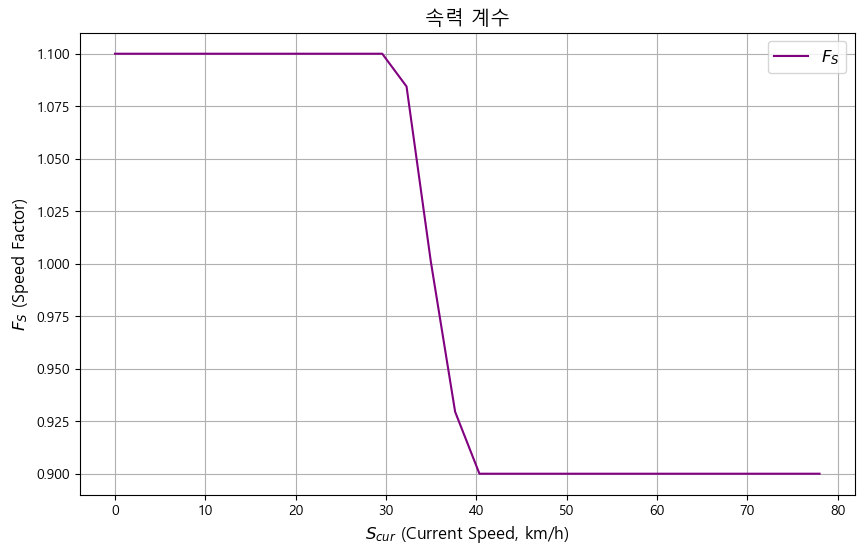

In [7]:
F_S = np.maximum(0.9, np.minimum(1.1, 35.0 / S_cur))

plt.figure(figsize=(10, 6))
plt.plot(S_cur, F_S, label="$F_S$", color="purple")
plt.title("속력 계수", fontsize=14)
plt.xlabel("$S_{cur}$ (Current Speed, km/h)", fontsize=12)
plt.ylabel("$F_S$ (Speed Factor)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

[1.         1.         1.00005423 1.00011789 1.00018155 1.00014482
 1.00007577 1.00001952 0.999972   0.99992999 0.99989054 0.99985056
 0.99980587 0.9997489  0.99965573 0.99971871 0.99993373 1.0001069
 1.00026176 1.00040531 1.00054086 1.0006703  1.00079485 1.00091536
 1.00103246 1.00114662 1.00125823 1.00136757 1.00147491 1.00158044]


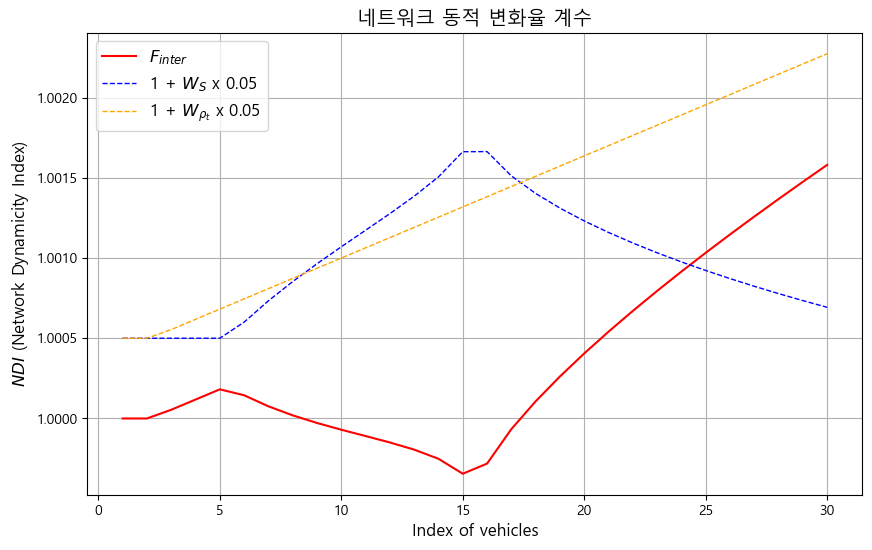

In [8]:
F_inter = 1.0 + (W_rho_t - W_S) * 0.05

df = S_cur - S_prev

print(F_inter)
# Plot
plt.figure(figsize=(10, 6))

plt.plot(N_t, F_inter, label="$F_{inter}$", color="red")
plt.plot(N_t,1 + W_S * 0.05, label="1 + $W_{S}$ x 0.05", color="blue", linestyle="--", linewidth=1)
plt.plot(N_t,1 + W_rho_t * 0.05, label="1 + $W_{\\rho_{t}}$ x 0.05", color="orange", linestyle="--", linewidth=1)

#plt.plot(N_t, W_S, label="$F_{inter}$ (Interaction Factor)", color="red")

plt.title("네트워크 동적 변화율 계수", fontsize=14)
plt.xlabel("Index of vehicles", fontsize=12)
plt.ylabel("$NDI$ (Network Dynamicity Index)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

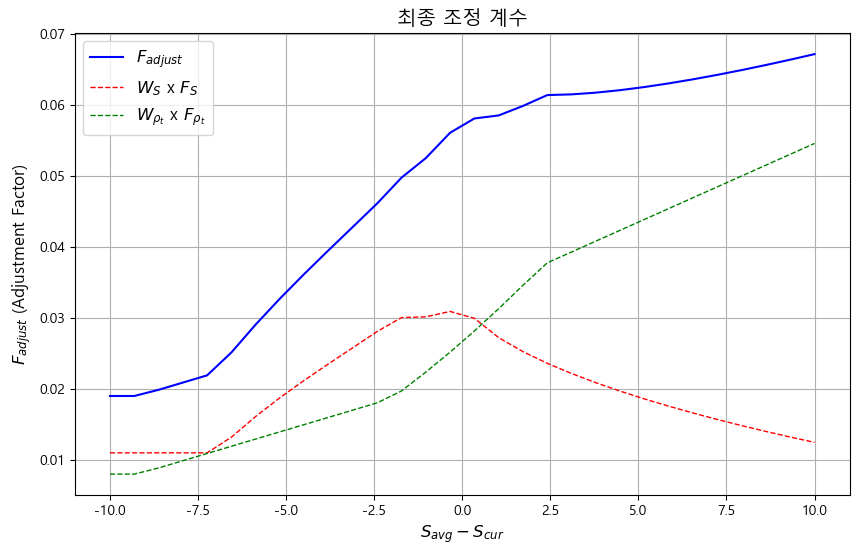

In [9]:
F_adjust = (W_S * F_S + W_rho_t * F_rho_t) * F_inter
plt.figure(figsize=(10, 6))
plt.plot(df, F_adjust, label="$F_{adjust}$", color="blue")

a = W_S * F_S
b = W_rho_t * F_rho_t

plt.plot(df, a, label="$W_S$ x $F_S$", color="red", linestyle="--", linewidth=1)
plt.plot(df, b, label="$W_{\\rho_t}$ x $F_{\\rho_t}$", color="green", linestyle="--", linewidth=1)


plt.title("최종 조정 계수", fontsize=14)
plt.xlabel("$S_{\t{avg}} - S_{\t{cur}}$", fontsize=12)
plt.ylabel("$F_{adjust}$ (Adjustment Factor)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

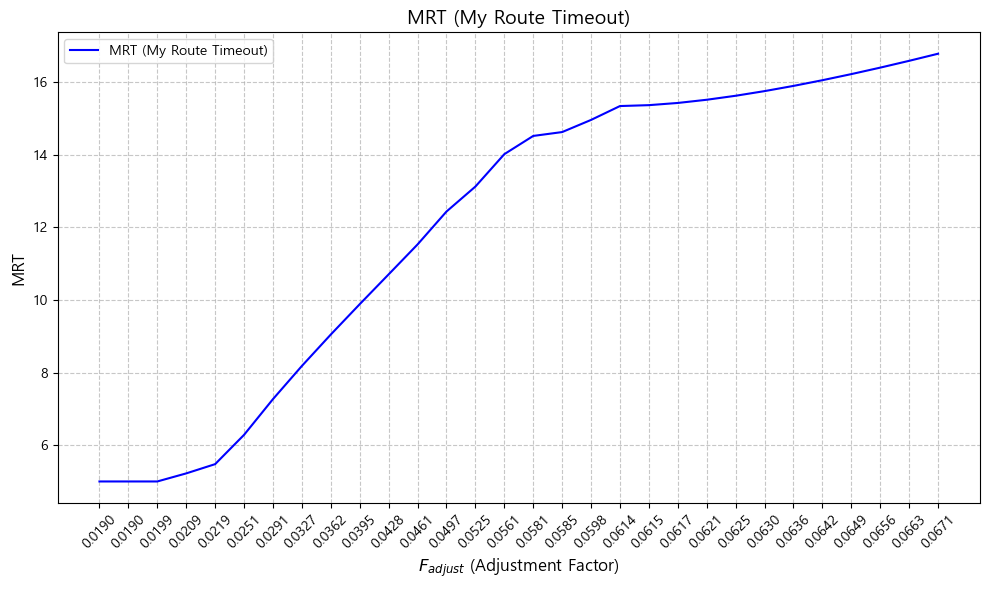

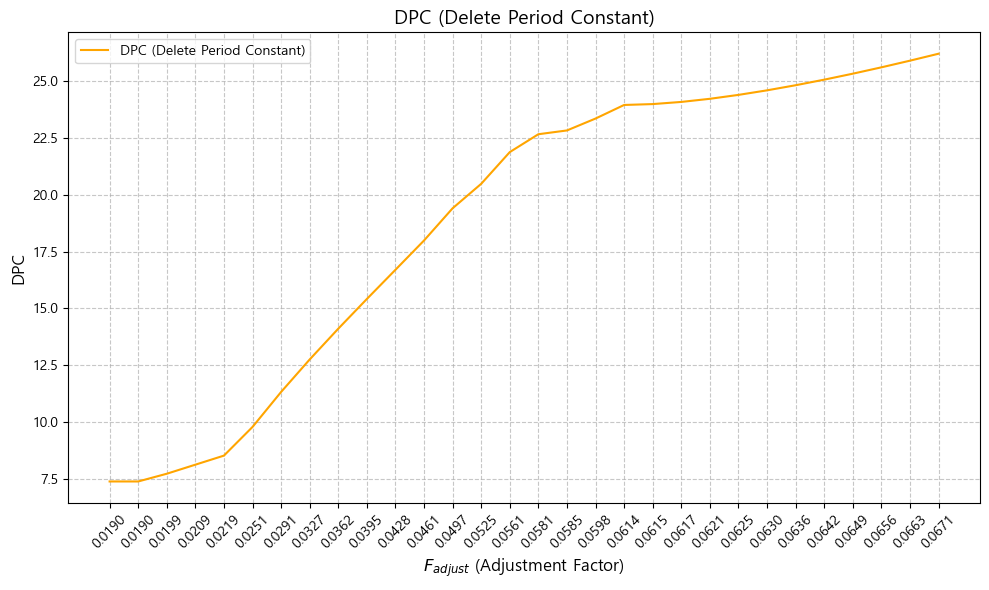

In [10]:
MRT_min = 5.0
MRT_max = 300.0
MRT_base = 250.0


DPC_min = 5.0
DPC_max = 500.0
DPC_base = 390.0

MRT = np.maximum(MRT_min, np.minimum(MRT_max, MRT_base * F_adjust))
DPC = np.maximum(DPC_min, np.minimum(DPC_max, DPC_base * F_adjust))

plt.figure(figsize=(10, 6))
plt.plot(MRT, marker=None, linestyle='-', label='MRT (My Route Timeout)', color="blue")
plt.xticks(ticks=range(len(F_adjust)), labels=[f"{x:.4f}" for x in F_adjust], rotation=45)

plt.title('MRT (My Route Timeout)', fontsize=14)
plt.xlabel('$F_{adjust}$ (Adjustment Factor)', fontsize=12)
plt.ylabel('MRT', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(DPC, marker=None, linestyle='-', label='DPC (Delete Period Constant)', color="orange")
plt.xticks(ticks=range(len(F_adjust)), labels=[f"{x:.4f}" for x in F_adjust], rotation=45)

plt.title('DPC (Delete Period Constant)', fontsize=14)
plt.xlabel('$F_{adjust}$ (Adjustment Factor)', fontsize=12)
plt.ylabel('DPC', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

